In [14]:
import pandas as pd
import glob
import matplotlib.pyplot as plt 
import numpy as np
from datetime import datetime, timedelta


In [132]:
path = 'CDC-Cases-Forecast'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)


In [172]:
target_dates = frame.target_end_date.unique()

In [170]:
jhu = pd.read_csv("jhu-us.csv")
jhu.Date=pd.to_datetime(jhu.Date)
jhu = jhu.set_index("Date", drop=True)
jhu = jhu.sort_index(ascending=True)

In [90]:
def add_days(date, days):
    date_1 = datetime.strptime(date, "%Y-%m-%d")
    end_date = date_1 + timedelta(days=days)
    return end_date.strftime('%Y-%m-%d')

In [198]:
jhu_weekly={}
for target_date in target_dates:
    if not target_date in jhu.index:
        continue
    weeklySum = jhu.loc[target_date].NewCases
    for i in range(6):
        pastDate = add_days(target_date, -(i+1))
        weeklySum += jhu.loc[pastDate].NewCases
    jhu_weekly[target_date] = weeklySum

In [212]:
jhu_weekly_df = pd.DataFrame.from_dict(jhu_weekly,orient='index', columns=['WeeklyCases']).sort_index(ascending=True)
jhu_weekly_df = jhu_weekly_df.reset_index()

jhu_weekly_df = jhu_weekly_df.rename(columns={"index": "target_end_date"})
jhu_weekly_df.target_end_date=pd.to_datetime(jhu_weekly_df.target_end_date)
jhu_weekly_df = jhu_weekly_df.set_index("target_end_date", drop=True).sort_index(ascending=True)


<AxesSubplot:xlabel='target_end_date'>

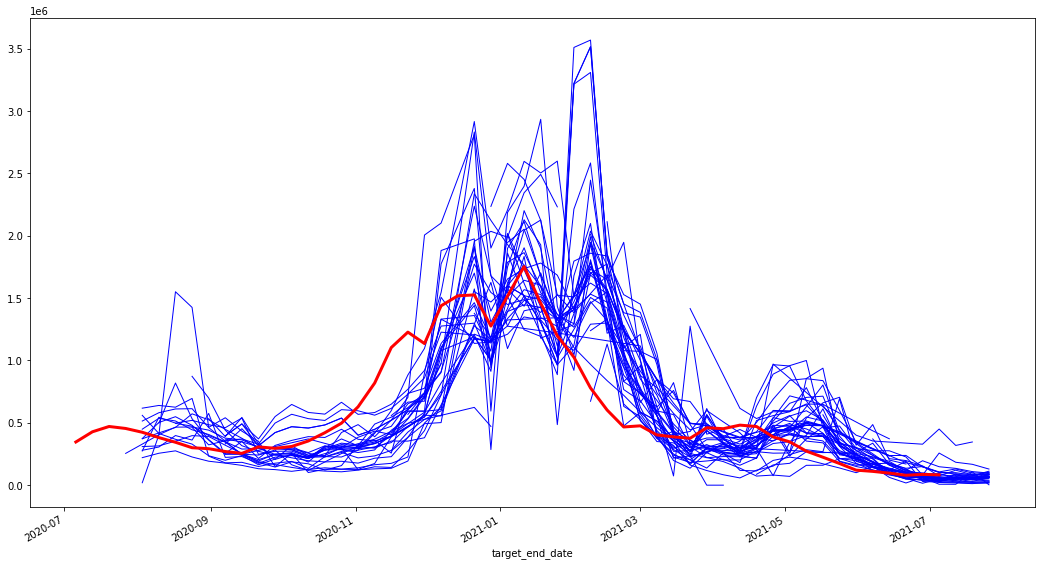

In [217]:
models = frame["Model"].unique()
fig, ax = plt.subplots()

for model in models:
    if model == "DDS-NBDS":
        continue
    model_frame = frame[(frame["Model"]==model) & (frame["target"] == "4 wk ahead inc case")][["target_end_date", "point"]]
    model_frame.target_end_date=pd.to_datetime(model_frame.target_end_date)
    model_frame = model_frame.set_index("target_end_date", drop=True)
    #model_frame.sort_index()["point"].plot(figsize=(18,10),ax=ax, linewidth=6, color='#77d481', legend=False, label='_nolegend_')
    model_frame.sort_index()["point"].plot(figsize=(18,10),ax=ax, linewidth=1,  label='_nolegend_', color='b')

jhu_weekly_df["WeeklyCases"].plot( linewidth=3,ax=ax,  label="JHU - Actual Confirmed", color='r')

In [187]:
model_frame

,point
target_end_date,
2020-11-30,691070.862316
2020-12-07,975332.337778


In [185]:
jhu_weekly[model_frame]

KeyError: "None of [DatetimeIndex(['2020-11-30', '2020-12-07'], dtype='datetime64[ns]', name='target_end_date', freq=None)] are in the [columns]"

<AxesSubplot:>

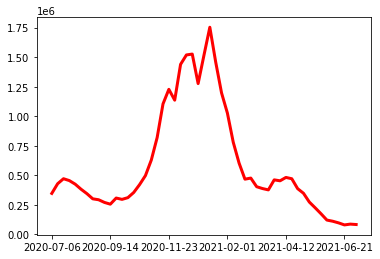

In [181]:
jhu_weekly["WeeklyCases"].plot( linewidth=3, label="JHU - Actual Confirmed", color='r')

In [152]:
model_frame

,point
target_end_date,
2020-11-30,691070.862316
2020-12-07,975332.337778


In [153]:
 jhu_weekly

,WeeklyCases
2021-05-03,347441.0
2021-05-10,273014.0
2021-05-17,224177.0
2021-05-24,173723.0
2021-07-05,82787.0
2020-07-13,428259.0
2020-07-20,470678.0
2020-07-27,454818.0
2020-08-03,424434.0
2020-09-14,255118.0


<AxesSubplot:>

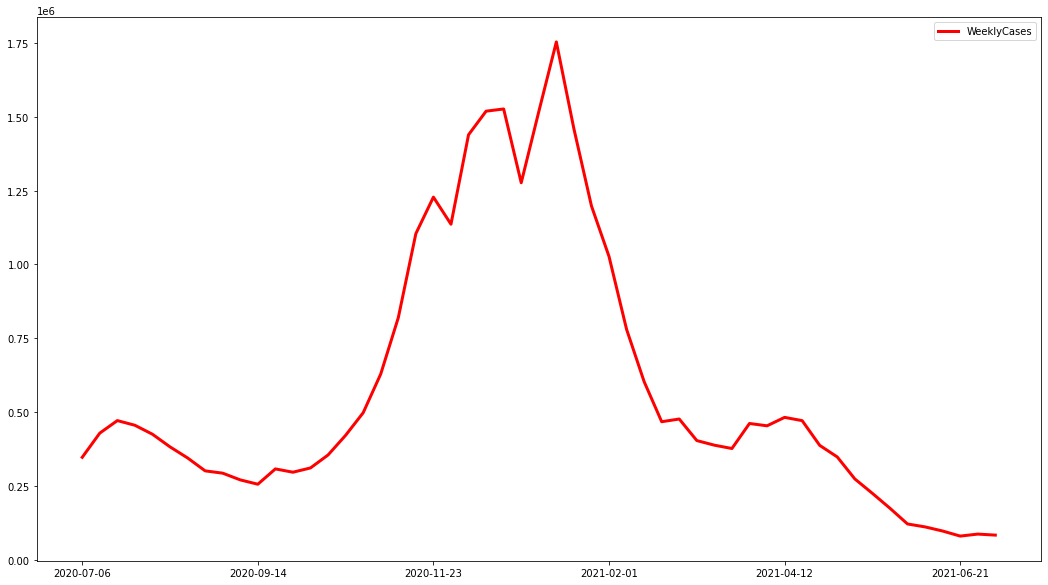

In [138]:
jhu_weekly.plot( linewidth=3,label="JHU - Actual Confirmed", color='r', figsize=(18,10))

<AxesSubplot:>

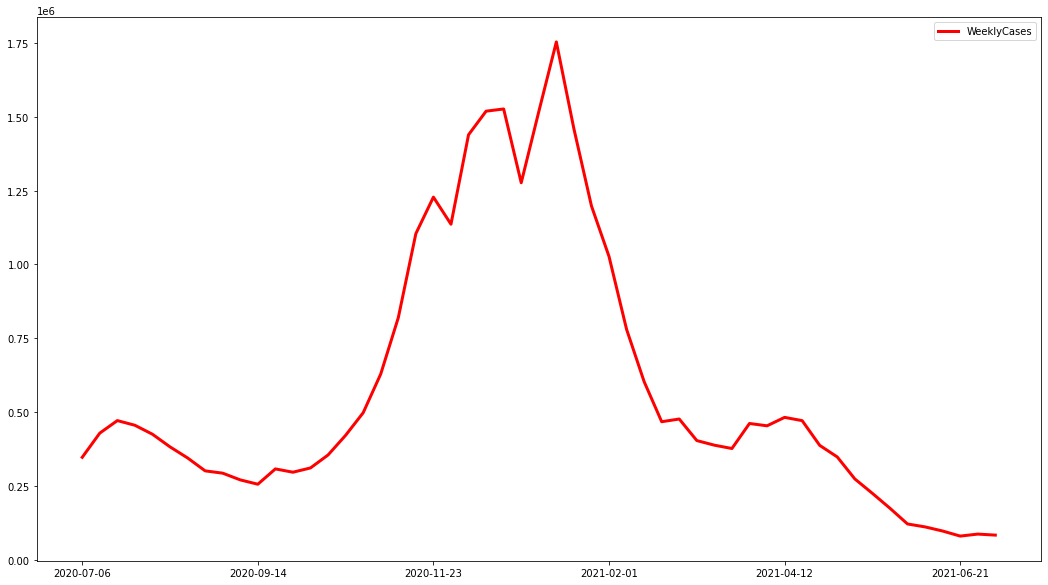

In [180]:
jhu_weekly.plot( linewidth=3,label="JHU - Actual Confirmed", color='r', figsize=(18,10))